In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_10_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_10_2.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 3s - loss: 0.3519 - accuracy: 0.8580 - val_loss: 0.2564 - val_accuracy: 0.8968
Epoch 2/100
100000/100000 - 2s - loss: 0.2307 - accuracy: 0.9063 - val_loss: 0.2204 - val_accuracy: 0.9101
Epoch 3/100
100000/100000 - 2s - loss: 0.2093 - accuracy: 0.9129 - val_loss: 0.2096 - val_accuracy: 0.9125
Epoch 4/100
100000/100000 - 2s - loss: 0.2008 - accuracy: 0.9147 - val_loss: 0.2002 - val_accuracy: 0.9149
Epoch 5/100
100000/100000 - 2s - loss: 0.1894 - accuracy: 0.9184 - val_loss: 0.1863 - val_accuracy: 0.9206
Epoch 6/100
100000/100000 - 2s - loss: 0.1742 - accuracy: 0.9243 - val_loss: 0.1688 - val_accuracy: 0.9259
Epoch 7/100
100000/100000 - 2s - loss: 0.1519 - accuracy: 0.9306 - val_loss: 0.1435 - val_accuracy: 0.9336
Epoch 8/100
100000/100000 - 2s - loss: 0.1316 - accuracy: 0.9376 - val_loss: 0.1287 - val_accuracy: 0.9396
Epoch 9/100
100000/100000 - 2s - loss: 0.1176 - accuracy: 0.9445 - val_loss: 0.1185 - val_accu

Epoch 77/100
100000/100000 - 2s - loss: 0.0178 - accuracy: 0.9927 - val_loss: 0.0393 - val_accuracy: 0.9864
Epoch 78/100
100000/100000 - 2s - loss: 0.0190 - accuracy: 0.9923 - val_loss: 0.0435 - val_accuracy: 0.9854
Epoch 79/100
100000/100000 - 2s - loss: 0.0211 - accuracy: 0.9915 - val_loss: 0.0417 - val_accuracy: 0.9861
Epoch 80/100
100000/100000 - 2s - loss: 0.0226 - accuracy: 0.9911 - val_loss: 0.0422 - val_accuracy: 0.9868
Epoch 81/100
100000/100000 - 2s - loss: 0.0177 - accuracy: 0.9927 - val_loss: 0.0389 - val_accuracy: 0.9876
Epoch 82/100
100000/100000 - 2s - loss: 0.0169 - accuracy: 0.9931 - val_loss: 0.0426 - val_accuracy: 0.9874
Epoch 83/100
100000/100000 - 2s - loss: 0.0145 - accuracy: 0.9939 - val_loss: 0.0397 - val_accuracy: 0.9875
Epoch 84/100
100000/100000 - 2s - loss: 0.0196 - accuracy: 0.9923 - val_loss: 0.0506 - val_accuracy: 0.9843
Epoch 85/100
100000/100000 - 2s - loss: 0.0234 - accuracy: 0.9910 - val_loss: 0.0440 - val_accuracy: 0.9867
Epoch 86/100
100000/100000 -

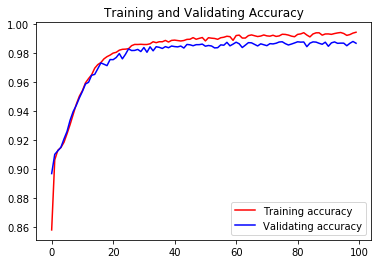

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_10_2_model.h5')